<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

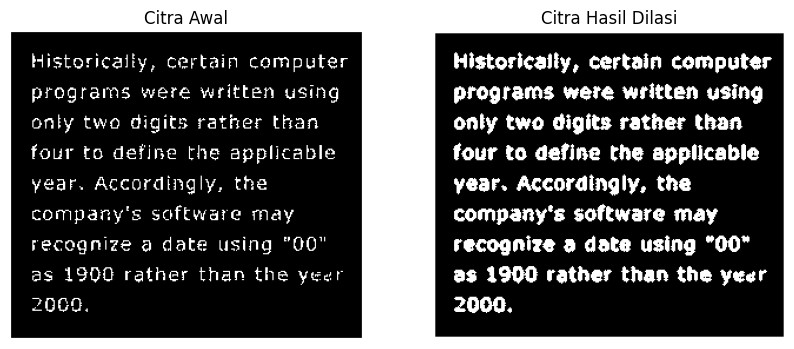

In [19]:
# Fungsi untuk dilasi dengan SE berbentuk cross 3x3
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    # Proses dilasi
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            # Lakukan dilasi: jika ada piksel dalam neighborhood yang sesuai dengan SE (cross) adalah 1, maka hasilnya 1
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Structuring element berbentuk cross 3x3
SE_cross = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

# Membaca gambar input
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/morphology.png')

# Konversi gambar menjadi grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mengubah citra grayscale menjadi biner menggunakan threshold
_, image_binary = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)

# Terapkan dilasi
dilated_image = dilasi_citra(image_binary, SE_cross)

# Menampilkan hasil
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


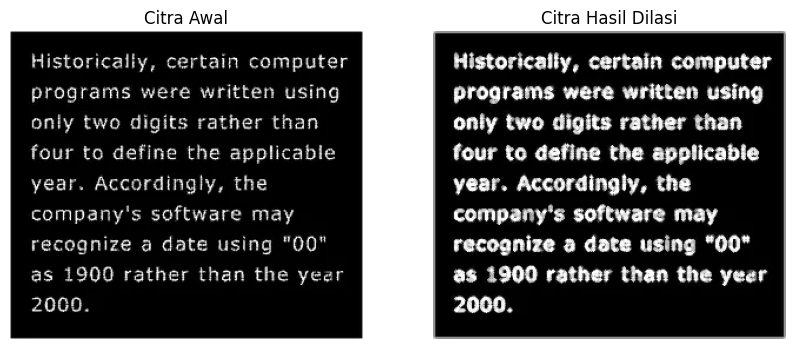

In [20]:
# Membaca gambar input
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/morphology.png')

# Structuring Element Dilasi berbentuk cross 3x3
SE_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Mencetak Structuring Element
print("Structuring Element (Cross 3x3):")
print(SE_cross)

# Melakukan operasi dilasi pada citra dengan SE berbentuk cross
dilated_image = cv2.dilate(image, SE_cross)

# Menampilkan gambar asli dan hasil dilasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

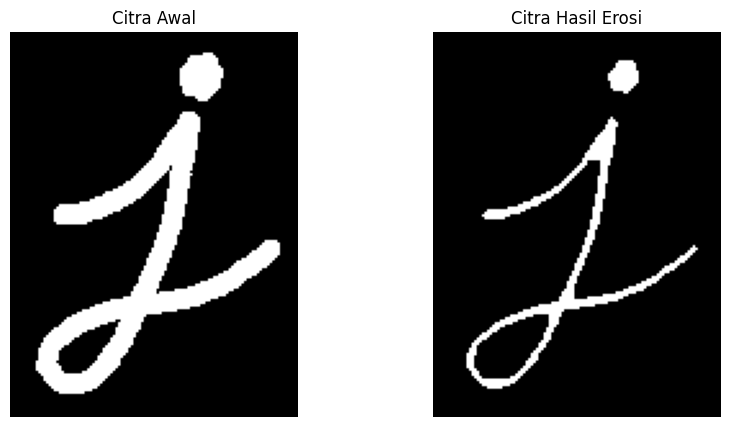

In [17]:
# Fungsi untuk melakukan erosi dengan SE berbentuk square 5x5
def erosi_citra(image, SE):
    # Ukuran citra
    rows, cols = image.shape

    # Buat citra hasil erosi dengan padding
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Menambahkan padding 2 pixel di sekeliling gambar untuk memproses tepian
    padded_image = np.pad(image, pad_width=2, mode='constant', constant_values=0)

    # Ukuran SE
    SE_rows, SE_cols = SE.shape

    # Proses erosi
    for i in range(2, rows + 2):
        for j in range(2, cols + 2):
            # Ambil neighborhood 5x5 dari piksel
            neighborhood = padded_image[i-2:i+3, j-2:j+3]
            # Lakukan erosi: jika semua piksel dalam neighborhood sesuai dengan SE, maka hasilnya 1
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-2, j-2] = 255

    return output_image

# Structuring element berbentuk square 5x5
SE_square = np.ones((5, 5), dtype=np.uint8)

# Membaca gambar input dalam grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan erosi
eroded_image = erosi_citra(image_binary, SE_square)

# Menampilkan hasil
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

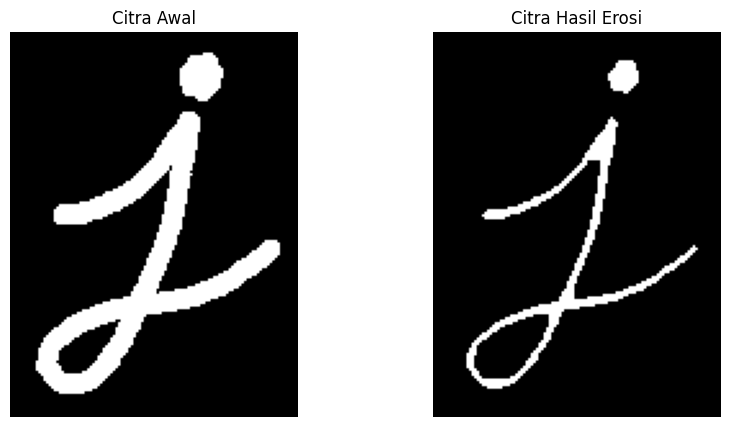

In [25]:
# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 5x5
SE_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi pada citra
eroded_image = cv2.erode(image, SE_square)

# Menampilkan gambar hasil sebelum dan setelah erosi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

**Tanpa menggunakan library morphology dari openCV**

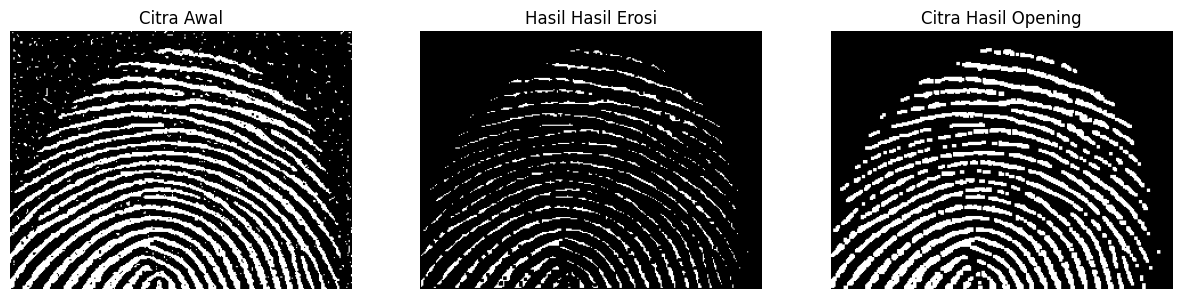

In [29]:
# Fungsi erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan operasi opening
def opening_citra(image, SE):
    eroded_image = erosi_citra(image, SE)
    opened_image = dilasi_citra(eroded_image, SE)
    return eroded_image, opened_image

# Membuat structuring element berbentuk square 3x3
SE_square = np.ones((3, 3), dtype=np.uint8)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi opening
eroded_image_manual, opened_image_manual = opening_citra(image_binary, SE_square)

# Menampilkan hasil tanpa library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah erosi (manual)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Erosi')
plt.imshow(eroded_image_manual, cmap='gray')
plt.axis('off')

# Gambar setelah operasi opening (manual)
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening')
plt.imshow(opened_image_manual, cmap='gray')
plt.axis('off')

plt.show()

**Dengan menggunakan library morphology dari openCV**

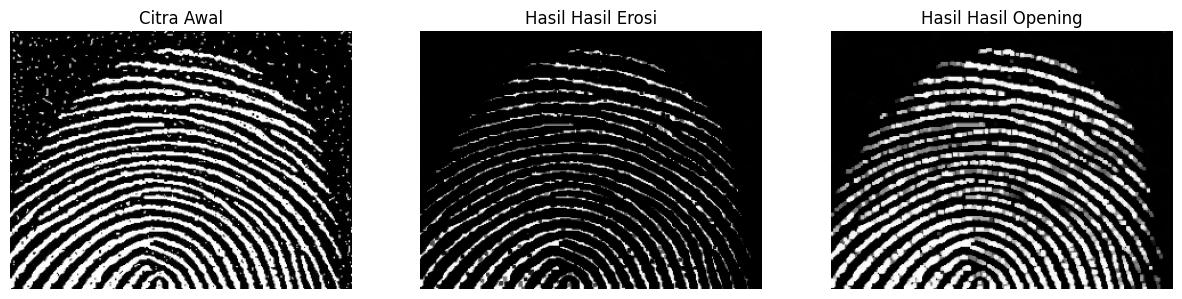

In [30]:
# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 3x3
SE_square = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi menggunakan fungsi morphology dari OpenCV
eroded_image_opencv = cv2.erode(image, SE_square)

# Melakukan operasi opening menggunakan fungsi morphology dari OpenCV
opened_image_opencv = cv2.morphologyEx(image, cv2.MORPH_OPEN, SE_square)

# Menampilkan hasil dengan library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah erosi (OpenCV)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Erosi')
plt.imshow(eroded_image_opencv, cmap='gray')
plt.axis('off')

# Gambar setelah operasi opening (OpenCV)
plt.subplot(1, 3, 3)
plt.title('Hasil Hasil Opening')
plt.imshow(opened_image_opencv, cmap='gray')
plt.axis('off')

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

**Tanpa menggunakan library morphology dari openCV**

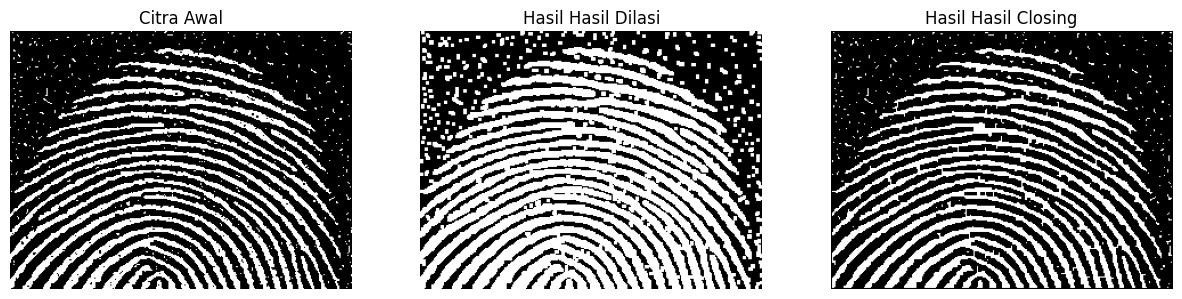

In [32]:
# Fungsi untuk melakukan erosi
def erosi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    SE_rows, SE_cols = SE.shape

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.all(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    SE_rows, SE_cols = SE.shape

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-1, j-1] = 255

    return output_image

# Fungsi untuk melakukan operasi closing
def closing_citra(image, SE):
    dilated_image = dilasi_citra(image, SE)
    closed_image = erosi_citra(dilated_image, SE)
    return dilated_image, closed_image

# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 3x3
SE_square = np.ones((3, 3), dtype=np.uint8)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi closing
dilated_image_manual, closed_image_manual = closing_citra(image_binary, SE_square)

# Menampilkan hasil tanpa library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (manual)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Dilasi')
plt.imshow(dilated_image_manual, cmap='gray')
plt.axis('off')

# Gambar setelah operasi closing (manual)
plt.subplot(1, 3, 3)
plt.title('Hasil Hasil Closing')
plt.imshow(closed_image_manual, cmap='gray')
plt.axis('off')

plt.show()

**Dengan menggunakan library morphology dari openCV**

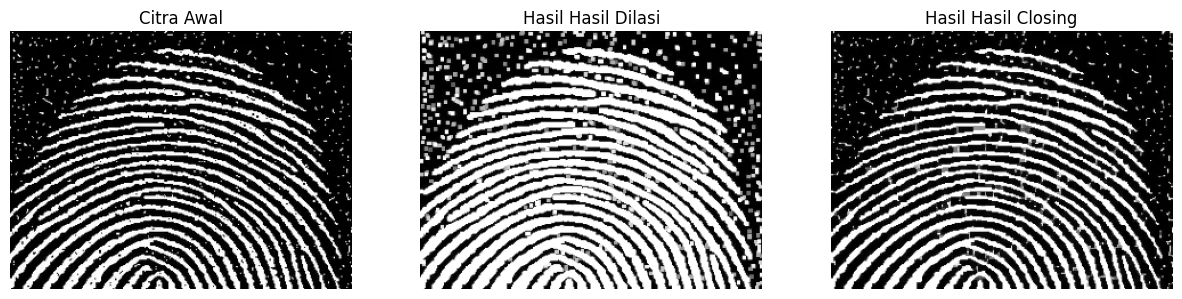

In [33]:
# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat structuring element berbentuk square 3x3
SE_square_opencv = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi dilasi menggunakan fungsi morphology dari OpenCV
dilated_image_opencv = cv2.morphologyEx(image, cv2.MORPH_DILATE, SE_square_opencv)

# Melakukan operasi closing menggunakan fungsi morphology dari OpenCV
closed_image_opencv = cv2.morphologyEx(image, cv2.MORPH_CLOSE, SE_square_opencv)

# Menampilkan hasil dengan library OpenCV
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (OpenCV)
plt.subplot(1, 3, 2)
plt.title('Hasil Hasil Dilasi')
plt.imshow(dilated_image_opencv, cmap='gray')
plt.axis('off')

# Gambar setelah operasi closing (OpenCV)
plt.subplot(1, 3, 3)
plt.title('Hasil Hasil Closing')
plt.imshow(closed_image_opencv, cmap='gray')
plt.axis('off')

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

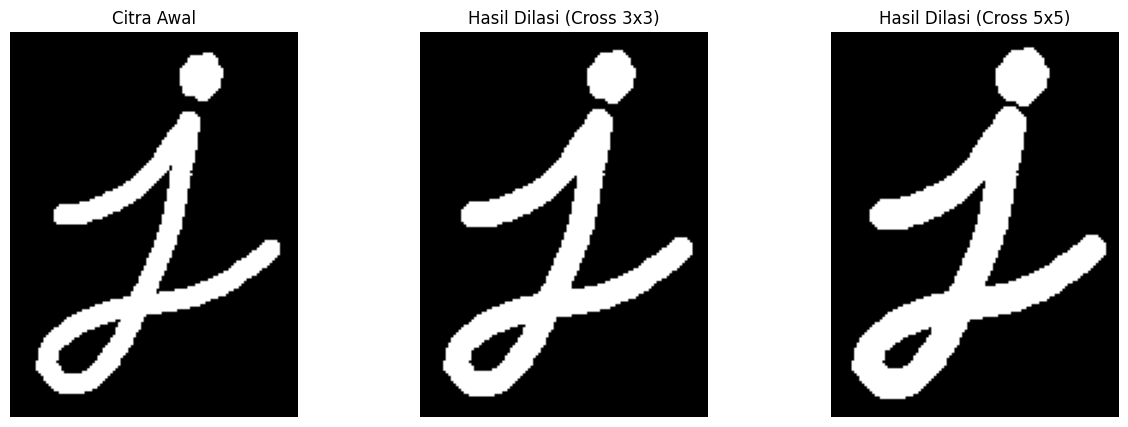

In [34]:
# Fungsi untuk melakukan dilasi
def dilasi_citra(image, SE):
    rows, cols = image.shape
    output_image = np.zeros((rows, cols), dtype=np.uint8)

    # Padding untuk SE 3x3 dan 5x5
    pad_size = SE.shape[0] // 2
    padded_image = np.pad(image, pad_width=pad_size, mode='constant', constant_values=0)

    # Proses dilasi
    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            if np.any(neighborhood[SE == 1] == 255):
                output_image[i-pad_size, j-pad_size] = 255

    return output_image

# Membuat structuring element berbentuk cross 3x3 dan 5x5
SE_cross_3x3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

SE_cross_5x5 = np.array([[0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0],
                          [1, 1, 1, 1, 1],
                          [0, 0, 1, 0, 0],
                          [0, 0, 1, 0, 0]], dtype=np.uint8)

# Membaca gambar input dalam mode grayscale
image = cv2.imread('drive/MyDrive/PCVK/image/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengubah citra menjadi biner (thresholding)
_, image_binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Terapkan operasi dilasi
dilated_image_cross_3x3 = dilasi_citra(image_binary, SE_cross_3x3)
dilated_image_cross_5x5 = dilasi_citra(image_binary, SE_cross_5x5)

# Menampilkan hasil dilasi
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image_binary, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Cross 3x3)
plt.subplot(1, 3, 2)
plt.title('Hasil Dilasi (Cross 3x3)')
plt.imshow(dilated_image_cross_3x3, cmap='gray')
plt.axis('off')

# Gambar setelah operasi dilasi (Cross 5x5)
plt.subplot(1, 3, 3)
plt.title('Hasil Dilasi (Cross 5x5)')
plt.imshow(dilated_image_cross_5x5, cmap='gray')
plt.axis('off')

plt.show()